In [4]:
import pandas as pd
import numpy as np

In [7]:
df=pd.read_csv("Student_Marks.csv")

In [8]:
df


,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [11]:
df.shape

(100, 3)

In [12]:
df.isnull().sum()

number_courses    0
time_study        0
Marks             0
dtype: int64

In [13]:
df.columns

Index(['number_courses', 'time_study', 'Marks'], dtype='object')

In [14]:
x=df[df.columns[:2]]
x

,number_courses,time_study
0,3,4.508
1,4,0.096
2,4,3.133
3,6,7.909
4,8,7.811
...,...,...
95,6,3.561
96,3,0.301
97,4,7.163
98,7,0.309


In [15]:
y=df['Marks']
y

0     19.202
1      7.734
2     13.811
3     53.018
4     55.299
       ...  
95    19.128
96     5.609
97    41.444
98    12.027
99    32.357
Name: Marks, Length: 100, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(80, 2)
(20, 2)
(80,)
(20,)


In [19]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(xtrain,ytrain)
y_pred=lr.predict(xtest)

In [21]:
from sklearn.metrics import r2_score

print("LR",r2_score(ytest,y_pred)*100)

LR 94.96097008381398


In [25]:
result=pd.DataFrame({'Actual':ytest,'Predicted':y_pred})
result

,Actual,Predicted
80,54.321,47.534467
84,16.461,18.472396
33,39.965,38.596914
81,17.705,19.922368
93,42.426,41.718555
17,38.490,39.693773
36,13.119,16.050825
82,44.099,39.063953
69,21.400,24.894678
65,13.562,15.542358


In [23]:
import matplotlib.pyplot as plt

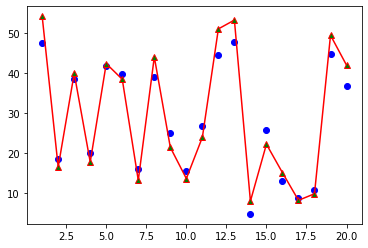

In [30]:
m=list(range(1,21))

plt.plot(m,ytest,color="red",marker='^',markerfacecolor='green')
plt.scatter(m,y_pred,color='blue')
plt.show()
       

# SVR

In [34]:
from sklearn.svm import SVR

sv=SVR()
sv.fit(xtrain,ytrain)

y_pred=sv.predict(xtest)


In [35]:
print("LR",r2_score(ytest,y_pred)*100)

LR 68.11478124341954


In [36]:
result=pd.DataFrame({'Actual':ytest,'Predicted':y_pred})
result

,Actual,Predicted
80,54.321,34.501451
84,16.461,17.667654
33,39.965,35.044516
81,17.705,18.328534
93,42.426,33.258616
17,38.490,32.483991
36,13.119,12.988297
82,44.099,32.464651
69,21.400,21.621181
65,13.562,13.775770


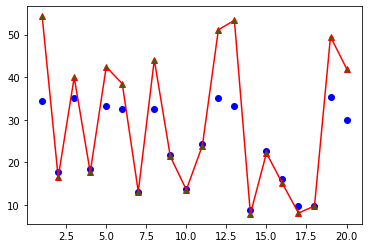

In [37]:
m=list(range(1,21))

plt.plot(m,ytest,color="red",marker='^',markerfacecolor='green')
plt.scatter(m,y_pred,color='blue')
plt.show()

# decision tree

In [42]:
from sklearn.tree import DecisionTreeRegressor

tree=DecisionTreeRegressor()
tree.fit(xtrain,ytrain)

y_pred=tree.predict(xtest)

print("LR",r2_score(ytest,y_pred)*100)

LR 98.16083557630377


In [43]:
result=pd.DataFrame({'Actual':ytest,'Predicted':y_pred})
result

,Actual,Predicted
80,54.321,53.018
84,16.461,12.647
33,39.965,41.358
81,17.705,12.647
93,42.426,41.358
17,38.490,38.278
36,13.119,13.811
82,44.099,43.978
69,21.400,19.106
65,13.562,12.209


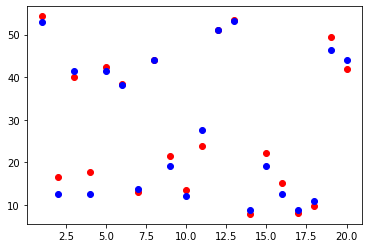

In [45]:
m=list(range(1,21))

plt.scatter(m,ytest,color="red")
plt.scatter(m,y_pred,color='blue')
plt.show()

In [46]:
from sklearn.ensemble import RandomForestRegressor
rfc=RandomForestRegressor()
rfc.fit(xtrain,ytrain)

y_pred=rfc.predict(xtest)

print("LR",r2_score(ytest,y_pred)*100)


LR 98.62207953987703


In [47]:
result=pd.DataFrame({'Actual':ytest,'Predicted':y_pred})
result

,Actual,Predicted
80,54.321,52.75200
84,16.461,12.65784
33,39.965,40.39795
81,17.705,12.94191
93,42.426,40.38865
17,38.490,37.11337
36,13.119,14.13043
82,44.099,45.89689
69,21.400,20.80064
65,13.562,12.15448


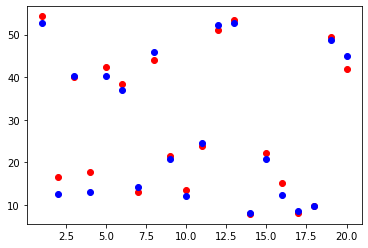

In [48]:
m=list(range(1,21))

plt.scatter(m,ytest,color="red")
plt.scatter(m,y_pred,color='blue')
plt.show()